# Project description

- Mobile carrier Megaline has found out that many of their subscribers use legacy plans. 

What we have:
- You have access to behavior data about subscribers who have already switched to the new plans (from the project for the Statistical Data Analysis course). 
- Since you’ve already performed the data preprocessing step, you can move straight to creating the model.

What we need to do:
- **They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra.**

- **For this classification task, you need to develop a model that will pick the right plan.**

- **Develop a model with the highest possible accuracy. In this project, the threshold for accuracy is 0.75. Check the accuracy using the test dataset.**

In [595]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats as st
from time import time

%matplotlib inline

In [596]:
#import libraries for categorical classification based on is_ultra

from sklearn.model_selection import train_test_split

#Decision tree import
from sklearn.tree import DecisionTreeClassifier

#Random Forest library
from sklearn.ensemble import RandomForestClassifier

#Logistic Regression
from sklearn.linear_model import LogisticRegression

#Accuracy score library
from sklearn.metrics import accuracy_score

# STEP 1

- Open and look through the data file. Path to the file:datasets/users_behavior.csv Download dataset.

In [597]:
#Open the .csv file and load into a dataframe
path = '/datasets/'
path1 = path + 'users_behavior.csv'
df = pd.read_csv(path1 ,sep=',')
accuracy_threshold=0.75

In [598]:
#Print the columns and shape of the dataframe
print(df.columns)
display('SHAPE',df.shape)

Index(['calls', 'minutes', 'messages', 'mb_used', 'is_ultra'], dtype='object')


'SHAPE'

(3214, 5)

## Data description
Every observation in the dataset contains monthly behavior information about one user. The information given is as follows:
- сalls — number of calls,
- minutes — total call duration in minutes,
- messages — number of text messages,
- mb_used — Internet traffic used in MB,
- is_ultra — plan for the current month (Ultra - 1, Smart - 0).

In [599]:
#Check the dataframe info for blank datatypes
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

## CONCLUSION ##
- Dataframe has no blank data
- Data types are correct

In [600]:
#Display the 5 top and bottom rows of the dataframe
display(df.head(), df.tail())

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


,calls,minutes,messages,mb_used,is_ultra
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0
3213,80.0,566.09,6.0,29480.52,1


In [601]:
#Check the number of ultra and smart plan users
#ultra users have is_ultra = 1, smart plan users have is_ultra = 0
func_percent = lambda x: round(100*x.count()/df.shape[0])
display(df.pivot_table(index='is_ultra',values=['calls','minutes','messages','mb_used'],aggfunc=['mean','sum','count']))
display(df.pivot_table(index='is_ultra',values=['calls'],aggfunc=[func_percent]))

mean                                            sum  \
              calls       mb_used   messages     minutes     calls   
is_ultra                                                             
0         58.463437  16208.466949  33.384029  405.942952  130315.0   
1         73.392893  19468.823228  49.363452  511.224569   72292.0   

                                          count                           
              mb_used messages    minutes calls mb_used messages minutes  
is_ultra                                                                  
0         36128672.83  74413.0  904846.84  2229    2229     2229    2229  
1         19176790.88  48623.0  503556.20   985     985      985     985

,<lambda>
,calls
is_ultra,
0,69.0
1,31.0


## CONCLUSION ##
- There are 2229 (71%) smart plan users, 985 (31%) ultra-plan users

# STEP 2
- Split the source data into a training set, a validation set, and a test set.

In [602]:
#SPLIT THE DATASET INTO TRAINING, VALIDATION and TEST

#FIRST SPLIT INTO TRAINING(60%) AND VALID_TEST (40%)
df_train, df_valid_test = train_test_split(df, test_size=0.40, random_state=12345)

#SPLIT VALID_TEST INTO VALIDATION and TEST (20% each)
df_valid, df_test = train_test_split(df_valid_test, test_size=0.5,random_state=12345)

totsize = len(df)

print('training set  : {0:.0%}'.format(len(df_train) /totsize),df_train.shape)
print('validation set: {0:.0%}'.format(len(df_valid)/totsize),df_valid.shape)
print('test set      : {0:.0%}'.format(len(df_test)/totsize),df_test.shape)

training set  : 60% (1928, 5)
validation set: 20% (643, 5)
test set      : 20% (643, 5)


In [603]:
func_percent_train = lambda x: round(100*x.count()/df_train.shape[0])
display(df_train.pivot_table(index='is_ultra',values=['calls'],aggfunc=['count',func_percent_train]))

,count,<lambda>
,calls,calls
is_ultra,,
0,1335,69.0
1,593,31.0


## CONCLUSION ##
**TRAINING DATASET**
- There are 1335 (69%) smart plan users, 593 (31%) ultra-plan users

In [604]:
func_percent_valid = lambda x: round(100*x.count()/df_valid.shape[0])
display(df_valid.pivot_table(index='is_ultra',values=['calls'],aggfunc=['count',func_percent_valid]))

,count,<lambda>
,calls,calls
is_ultra,,
0,454,71.0
1,189,29.0


## CONCLUSION ##
**VALIDATION DATASET**
- There are 454 (71%) smart plan users, 189 (29%) ultra-plan users

In [605]:
func_percent_test = lambda x: round(100*x.count()/df_test.shape[0])
display(df_test.pivot_table(index='is_ultra',values=['calls'],aggfunc=['count',func_percent_test]))

,count,<lambda>
,calls,calls
is_ultra,,
0,440,68.0
1,203,32.0


## CONCLUSION ##

**TEST DATASET**
- There are 440 (68%) smart plan users, 203 (32%) ultra-plan users

## CONCLUSION ##
- Divided the plan into 3 sets: (Training Set, Validation Set, Test Set)
For the split between smart and ultra plan users
    - The main dataset had a split of 69%,21% 
    - The training dataset has the same split
    - The validation dataset has 71%, 29% split
    - The test dataset has 68%, 32% split

- Looks like the validation dataset has more smart plan users than ultra plan users.
- Since we want the validation dataset to be as close to the main dataset, we can switch the test dataset and the validation dataset.

In [606]:
tmp = df_test
df_test = df_valid
df_valid = tmp

display('TEST DATASET',df_test.pivot_table(index='is_ultra',values=['calls'],aggfunc=['count',func_percent_test]))
display('VALIDATION DATASET',df_valid.pivot_table(index='is_ultra',values=['calls'],aggfunc=['count',func_percent_valid]))

'TEST DATASET'

,count,<lambda>
,calls,calls
is_ultra,,
0,454,71.0
1,189,29.0


'VALIDATION DATASET'

,count,<lambda>
,calls,calls
is_ultra,,
0,440,68.0
1,203,32.0


## CONCLUSION ##
- NOW our main dataset, training dataset have 69%, 31% split on is_ultra
- The validation dataset has 68%%, 32% split
- The test dataset has 71%, 29% split
- The validation dataset split is closer to the main dataset split
- Now we do use the classification models to identify the best model(s) with best Hyperparameters.

In [607]:
#Prepare the feature and target dataset from the Training dataset
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']

#Prepare the validation dataset and validation target dataset
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

#Prepare test dataset and test target dataset
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

In [608]:
#Create a dataframe to store function, accuracy results and if they meet or exceeed the accuracy threshold

column_names = ["function", "hyperparameters", "classification_time","accuracy_score validation","accuracy_score test",'above_threshold?']

df_results = pd.DataFrame(columns = column_names)


# STEP 3

- Investigate the quality of different models by changing hyperparameters. Briefly describe the findings of the study.
- Check the quality of the model using the test set.
- Additional task: sanity check the model. 
- 3 Binary classification models to be tested:
  - Decision Tree Classifier
  - Forest Classifier
  - Regression Classifier

In [609]:
#Decision Tree Classifier without any Hyperparameter

model = DecisionTreeClassifier()

t0 = time()
model.fit(features_train, target_train)
time_fit = np.round(time() - t0,decimals=4)

predictions_valid = model.predict(features_valid)
predictions_test = model.predict(features_test)

accuracy_valid = accuracy_score(target_valid, predictions_valid)
accuracy_test = accuracy_score(target_test, predictions_test)

print(accuracy_valid, accuracy_test)

0.7325038880248833 0.71850699844479


In [610]:
above_threshold = np.where(accuracy_test > accuracy_threshold, True, False)
rows = [pd.Series(['DecisionTree', 'None', str(time_fit),accuracy_valid,accuracy_test,above_threshold], index=df_results.columns)]
# append the rows
df_results = df_results.append(rows)
# check the rows 
df_results.round(decimals=4)

,function,hyperparameters,classification_time,accuracy_score validation,accuracy_score test,above_threshold?
0,DecisionTree,None,0.0155,0.7325,0.7185,False


## CONCLUSION ##
- The Decision Tree Classifier results in an accuracy score of 72% on test data.
- We need an accuracy score of 75% or more.
- We need to use Hyperparameters and we will do that in the following code.

In [611]:
#Decision Tree Classifier with Hyperparameter 'max_depth'
# < create a loop for max_depth from 1 to 5 >
highest_score=0
for depth in range(1,6):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)

    accuracy_valid  = model.score(features_valid, target_valid)
    
    print("max_depth =",depth,": ", 'accuracy score:',accuracy_valid)

    if (accuracy_valid > highest_score):
        highest_score = accuracy_valid
        highest_depth = depth
 
print('Highest depth: ', highest_depth,'Highest Accuracy Score', highest_score)

model = DecisionTreeClassifier(random_state=12345, max_depth=highest_depth)


t0 = time()
model.fit(features_train, target_train)
time_fit = np.round(time() - t0,decimals=4)

accuracy_test = model.score(features_test, target_test)
print('Test Data Accuracy Score', accuracy_test,'Depth: ', highest_depth)

max_depth = 1 :  accuracy score: 0.7356143079315708
max_depth = 2 :  accuracy score: 0.7744945567651633
max_depth = 3 :  accuracy score: 0.7791601866251944
max_depth = 4 :  accuracy score: 0.7744945567651633
max_depth = 5 :  accuracy score: 0.7838258164852255
Highest depth:  5 Highest Accuracy Score 0.7838258164852255
Test Data Accuracy Score 0.7791601866251944 Depth:  5


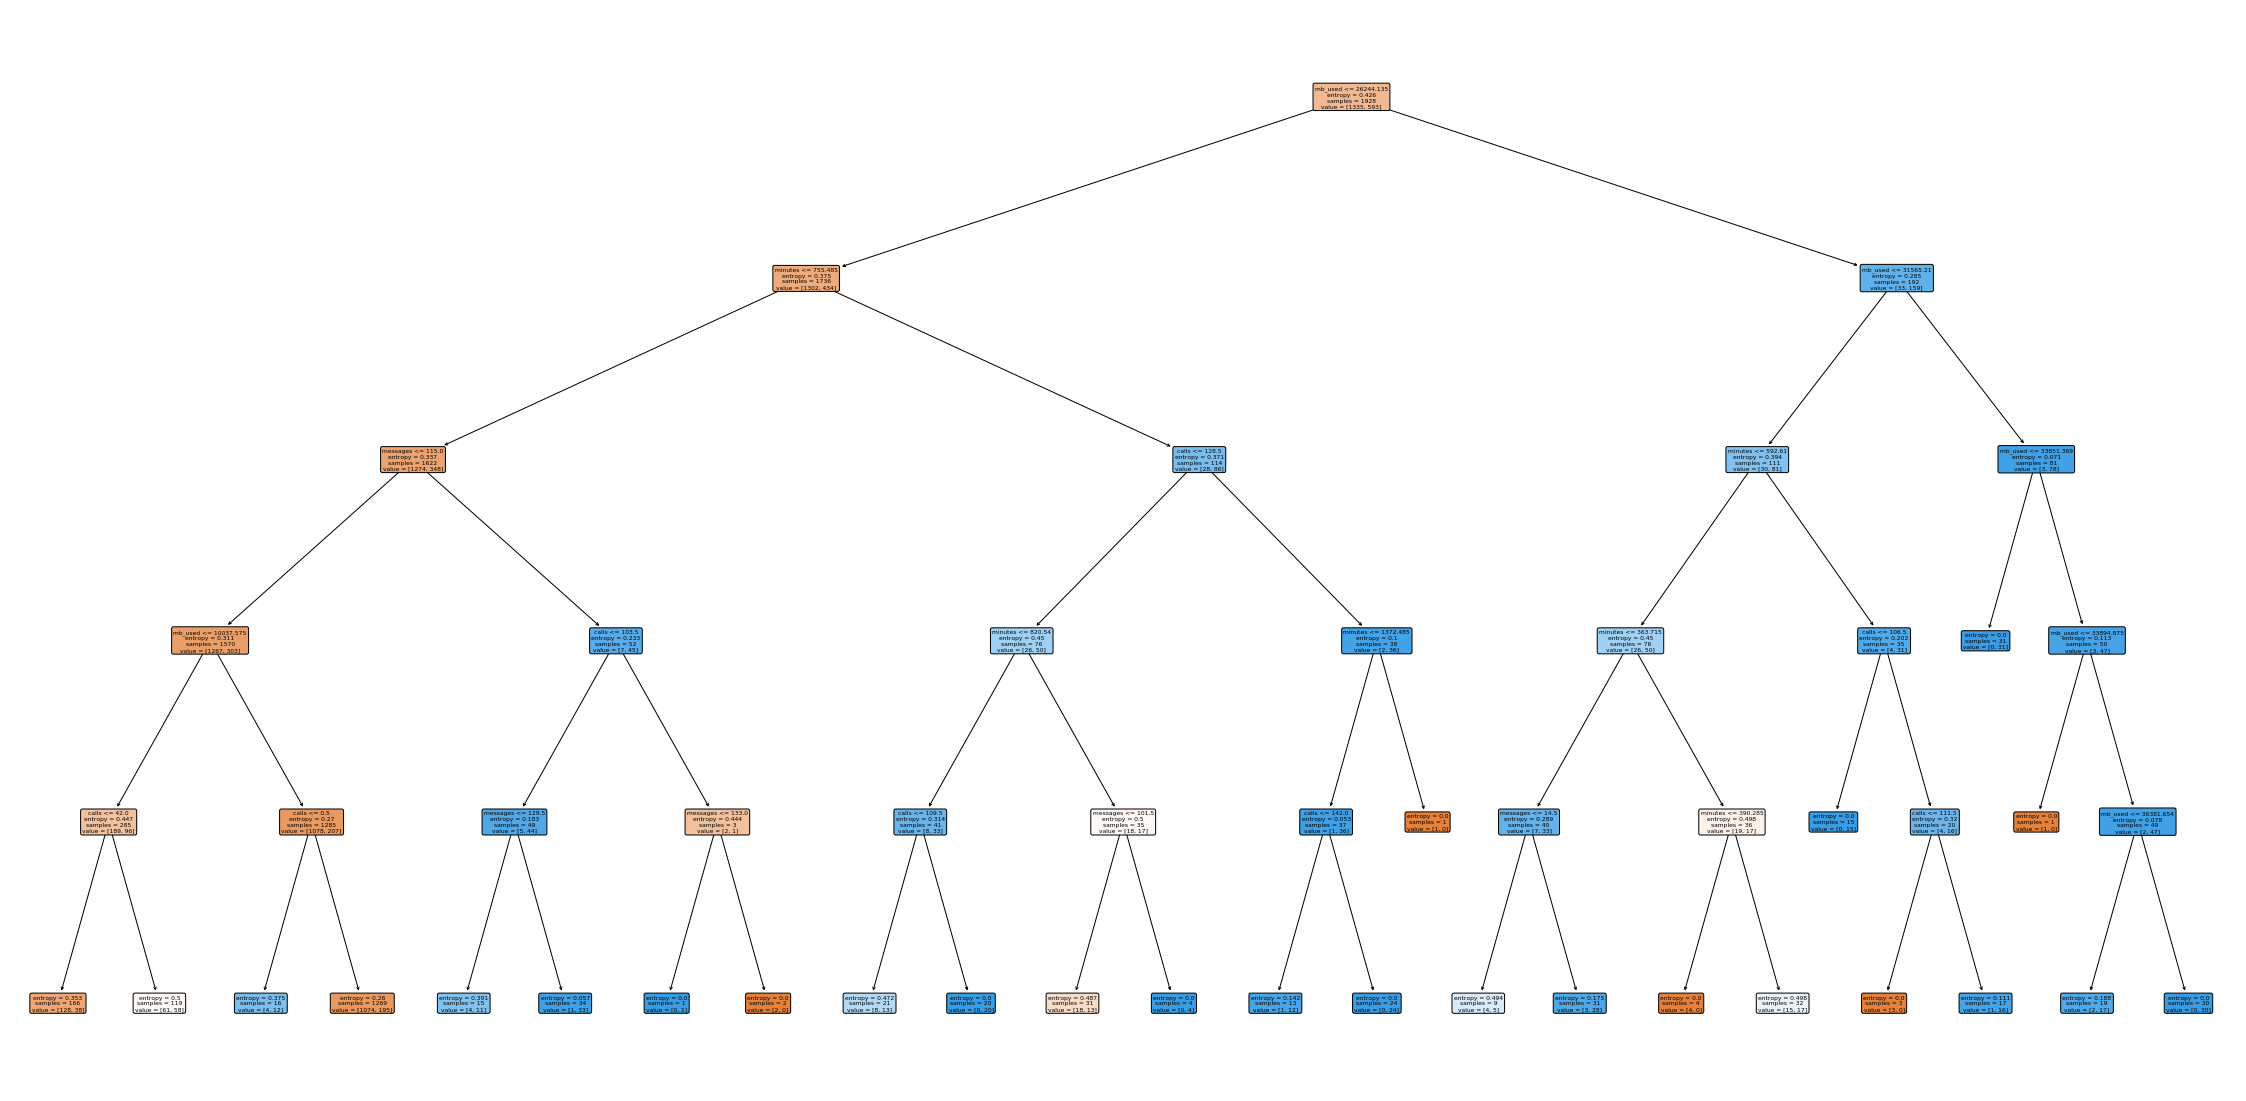

In [612]:
from sklearn import tree
plt.figure(figsize=(40,20))  
tree.plot_tree(model, feature_names = features_train.columns,filled=True, fontsize=6, rounded = True)
plt.show()

In [613]:
above_threshold = np.where(accuracy_test > accuracy_threshold, True, False)
rows = [pd.Series(['DecisionTree', 'max_depth ='+ str(highest_depth) , str(time_fit),highest_score,accuracy_test,above_threshold], index=df_results.columns)]
# append the rows
df_results = df_results.append(rows)
# check the rows
df_results.round(decimals=4)

,function,hyperparameters,classification_time,accuracy_score validation,accuracy_score test,above_threshold?
0,DecisionTree,None,0.0155,0.7325,0.7185,False
0,DecisionTree,max_depth =5,0.009,0.7838,0.7792,True


## CONCLUSION ##
- The Decision Tree classifier with Hyperparameter  max_depth = 5 gave the maximum accuracy score of 78% on Validation data
- We will use the max_depth = 5 for test dataset.
- On test dataset, the accuracy score is 77.9%

In [614]:
#RandomForest Classifier
#Testing Accuracy_score on the Validation dataset to identify the best Hyperparameter
#Test the hyperparameter n_estimators from 1 - 14.
highest_score = 0.0
for forest_estimator in range(1,11):
    model = RandomForestClassifier(random_state=12345, n_estimators=forest_estimator)
    model.fit(features_train, target_train)
    accuracy_valid = model.score(features_valid, target_valid)
    print('Estimator: ', forest_estimator,' Accuracy Score', accuracy_valid)
        
    if (accuracy_valid > highest_score):
        highest_score = accuracy_valid
        highest_estimator = forest_estimator
 
print('Highest Estimator: ', highest_estimator,'Highest Accuracy Score', highest_score)
 
model = RandomForestClassifier(random_state=12345, n_estimators=highest_estimator)
t0 = time()
model.fit(features_train, target_train)
time_fit = np.round(time() - t0, decimals=4)

accuracy_test = model.score(features_test, target_test)
print('Test Data Accuracy Score', accuracy_test,'Estimator: ', highest_estimator)

Estimator:  1  Accuracy Score 0.7402799377916018
Estimator:  2  Accuracy Score 0.7589424572317263
Estimator:  3  Accuracy Score 0.7573872472783826
Estimator:  4  Accuracy Score 0.7729393468118196
Estimator:  5  Accuracy Score 0.7667185069984448
Estimator:  6  Accuracy Score 0.7791601866251944
Estimator:  7  Accuracy Score 0.7807153965785381
Estimator:  8  Accuracy Score 0.7869362363919129
Estimator:  9  Accuracy Score 0.7838258164852255
Estimator:  10  Accuracy Score 0.7807153965785381
Highest Estimator:  8 Highest Accuracy Score 0.7869362363919129
Test Data Accuracy Score 0.7822706065318819 Estimator:  8


In [615]:
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,20))
#tree.plot_tree(model.estimators_[0],
#               feature_names = features_train.columns, 
#               filled = True)
#plt.show();
#This code displays very good forest graph however, it creates issue with saving the file, hence I have commented this code.

In [616]:
above_threshold = np.where(accuracy_test > accuracy_threshold, True, False)
rows = [pd.Series(['RandomForest', 'n_estimators ='+ str(highest_estimator) ,time_fit, highest_score,accuracy_test,above_threshold], index=df_results.columns)]
# append the rows
df_results = df_results.append(rows)
# check the rows
df_results.round(decimals=4)

,function,hyperparameters,classification_time,accuracy_score validation,accuracy_score test,above_threshold?
0,DecisionTree,None,0.0155,0.7325,0.7185,False
0,DecisionTree,max_depth =5,0.009,0.7838,0.7792,True
0,RandomForest,n_estimators =8,0.0467,0.7869,0.7823,True


## CONCLUSION ##
- The Random Forest classifier with Hyperparameter  n_estimators = 8 gave the maximum accuracy score of 78.6% on Validation data
- We will use the max_depth = 8 for test dataset.
- On test dataset, the accuracy score is 78
- The results on test dataset are same as on the validation test dataset
- This test seems to be better in the consistency of results in Validation and Test Datasets

In [617]:
#Logistic Regression model
#This model has no Hyperparameters

model= LogisticRegression(random_state=12345, solver='liblinear')

t0 = time()
model.fit(features_train, target_train)
time_fit = np.round(time() - t0,decimals=4)

accuracy_valid = model.score(features_valid, target_valid)
accuracy_test = model.score(features_test, target_test)
print(time_fit,accuracy_valid, accuracy_test)

0.0205 0.7402799377916018 0.7589424572317263


In [618]:
above_threshold = np.where(accuracy_test > accuracy_threshold, True, False)
rows = [pd.Series(['LogisticRegression', 'None' ,time_fit, accuracy_valid,accuracy_test,above_threshold], index=df_results.columns)]
# append the rows
df_results = df_results.append(rows)
# check the rows
df_results.round(decimals=4)

,function,hyperparameters,classification_time,accuracy_score validation,accuracy_score test,above_threshold?
0,DecisionTree,None,0.0155,0.7325,0.7185,False
0,DecisionTree,max_depth =5,0.009,0.7838,0.7792,True
0,RandomForest,n_estimators =8,0.0467,0.7869,0.7823,True
0,LogisticRegression,None,0.0205,0.7403,0.7589,True


## CONCLUSION ##
- For the Logistic Regression, I tested with three datasets - Training, Validation and Test.
- The result shows accuracy score of 76%

- We need only two datasets - Training and Test for Logistic Regression and will do that in the following code. This will make our training dataset bigger and may help in a better model.

In [619]:
#For logistic regression, we need only training and test dataset
df_train2, df_test2 = train_test_split(df, test_size=0.75, random_state=12345)

features_train2 = df_train2.drop(['is_ultra'], axis=1)
target_train2 = df_train2['is_ultra']

#Prepare test dataet
features_test2 = df_test2.drop(['is_ultra'], axis=1)
target_test2 = df_test2['is_ultra']
model.fit(features_train2, target_train2)
accuracy_test = model.score(features_test2, target_test2)
print(accuracy_test)

0.7445043550394027


## CONCLUSION ##

- I tested with two datasets - Training (75%) and Test (25%). This made our training dataset bigger.
- The accuracy score for the test dataset decreased from 74% to 74.45%

In [620]:
print('SIZE of DATASETS')
print('training set  : {0:.0%}'.format(len(df_train) /totsize),df_train.shape)
print('validation set: {0:.0%}'.format(len(df_valid)/totsize),df_valid.shape)
print('test set      : {0:.0%}'.format(len(df_test)/totsize),df_test.shape)
print('----')
print('ANALYSIS REPORT ON VARIOUS CLASSIFICATION FUNCTIONS')
display(df_results.round(decimals=4))

SIZE of DATASETS
training set  : 60% (1928, 5)
validation set: 20% (643, 5)
test set      : 20% (643, 5)
----
ANALYSIS REPORT ON VARIOUS CLASSIFICATION FUNCTIONS


,function,hyperparameters,classification_time,accuracy_score validation,accuracy_score test,above_threshold?
0,DecisionTree,None,0.0155,0.7325,0.7185,False
0,DecisionTree,max_depth =5,0.009,0.7838,0.7792,True
0,RandomForest,n_estimators =8,0.0467,0.7869,0.7823,True
0,LogisticRegression,None,0.0205,0.7403,0.7589,True


# OVERALL CONCLUSION

**The above tables display the**
  - size of training, validation and test data sets
  - classification model (with / without hyper-parameters), 
  - total time taken to train the data, 
  - accuracy_score for validation, 
  - accuracy_score for test data, and 
  - if the accuracy score of test_data was above 0.75.

**Based on this table**

  - Decision Tree without Hyperparameters didn't qualify because the accuracy_score was  72%
  - Least time taken was 0.006 seconds by Decision Tree with max_depth = 5, 
  - Most  time taken was 0.044 seconds by Random Forest, with n_estimators=8, 
  - Highest accuracy_score was in Random_Forest of 78.2% 
  - Lowest Accuracy_score was in Logistic Regression of 75.9%

# Project Checklist

X-  How did you look into data after downloading?

X-  Have you correctly split the data into train, validation, and test sets?

X-  How have you chosen the sets' sizes?

X-  Did you evaluate the quality of the models correctly?

X-  What models and hyperparameters did you use?

X-  What are your findings?

X-  Did you test the models correctly?

X-  What is your accuracy score?

X-  Have you stuck to the project structure and kept the code neat?